# Logic and Loops

This lesson covers:

* Mixing logic and loops 
* `all` and `any` 

Begin by loading the data in momentum.csv.


In [1]:
# Setup: Load the momentum data

import numpy as np
import pandas as pd

momentum = pd.read_csv('data/momentum.csv', index_col='date', parse_dates=True)

print(momentum.head())

mom_01 = momentum['mom_01']
mom_10 = momentum['mom_10']
mom_05 = momentum['mom_05']

            mom_01  mom_02  mom_03  mom_04  mom_05  mom_06  mom_07  mom_08  \
date                                                                         
2016-01-04    0.67   -0.03   -0.93   -1.11   -1.47   -1.66   -1.40   -2.08   
2016-01-05   -0.36    0.20   -0.37    0.28    0.16    0.18   -0.22    0.25   
2016-01-06   -4.97   -2.33   -2.60   -1.16   -1.70   -1.45   -1.15   -1.46   
2016-01-07   -4.91   -1.91   -3.03   -1.87   -2.31   -2.30   -2.70   -2.31   
2016-01-08   -0.40   -1.26   -0.98   -1.26   -1.13   -1.02   -0.96   -1.42   

            mom_09  mom_10  
date                        
2016-01-04   -1.71   -2.67  
2016-01-05    0.29    0.13  
2016-01-06   -1.14   -0.45  
2016-01-07   -2.36   -2.66  
2016-01-08   -0.94   -1.32  


## Problem: Logical Statements and for Loops
Use a for loop along with an if statement to simulate an asymmetric random walk of the form 

$$y_{i}=y_{i-1}+e_{i}+I_{[e_{i}<0]}e_{i}$$

where $I_{[e_{i}<0]}$ is known as an indicator variable that takes the value 1 if the statement in 
brackets is true. Plot y. $e$ is a standard normal shock. Use `cumsum` to simulate a symmetric
one (`z`), and plot the two using the code in the cell below.
 

In [2]:
e = np.random.standard_normal(100)
y = np.zeros(100)
y[0] = e[0]
for i in range(1, 100):
    y[i] = y[i-1] + e[i] + e[i] * (e[i] < 0)

z = np.cumsum(e)

In [3]:
# Setup: Plot the data
%matplotlib inline

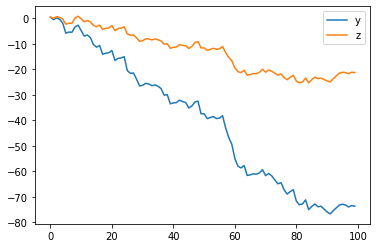

In [4]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(z)
plt.legend(['y', 'z'])


## Problem: Selecting Elements using Logical Statements
For portfolio 1 and portfolio 10, select the elements that are $<0$, $\geq 0$ and exactly equal to 
$0$. Next select the elements where both portfolios are less than $0$. 


In [5]:
mom_01_neg = mom_01[mom_01 < 0]
mom_10_neg = mom_10[mom_10 < 0]
print(mom_01_neg[:10])
print(mom_10_neg[:10])

date
2016-01-05   -0.36
2016-01-06   -4.97
2016-01-07   -4.91
2016-01-08   -0.40
2016-01-11   -5.14
2016-01-12   -1.84
2016-01-13   -4.88
2016-01-15   -3.85
2016-01-19   -4.74
2016-01-20   -1.27
Name: mom_01, dtype: float64
date
2016-01-04   -2.67
2016-01-06   -0.45
2016-01-07   -2.66
2016-01-08   -1.32
2016-01-13   -3.71
2016-01-15   -2.40
2016-01-20   -0.42
2016-01-25   -1.12
2016-01-27   -2.02
2016-02-02   -1.70
Name: mom_10, dtype: float64


In [6]:
mom_01_eq0 = mom_01[mom_01 == 0]
# There are none, so this series is empty
print(mom_01_eq0)

mom_10_eq0 = mom_10[mom_10 == 0]
print(mom_10_eq0)

Series([], Name: mom_01, dtype: float64)
date
2016-05-31    0.0
2017-02-10    0.0
2017-11-08    0.0
Name: mom_10, dtype: float64


In [7]:
mom_01_neg = mom_01[mom_01 >= 0]
print(mom_01_neg[:10])

date
2016-01-04    0.67
2016-01-14    3.85
2016-01-21    7.67
2016-01-22    4.24
2016-01-26    4.75
2016-01-28    1.04
2016-01-29    6.12
2016-02-03    4.92
2016-02-04    3.26
2016-02-12    5.19
Name: mom_01, dtype: float64


## Problem: Using `where`
Use `where` to select the index of the elements in portfolio 5 that are negative. Next, use the
`where` command in its two output form to determine which elements of the portfolio return matrix
are less than -2%.

In [8]:
np.where(mom_05 < 0)

(array([  0,   2,   3,   4,   5,   7,   9,  10,  11,  14,  16,  19,  20,
         23,  24,  25,  26,  27,  31,  32,  34,  38,  44,  48,  49,  54,
         55,  56,  57,  60,  62,  63,  65,  70,  71,  75,  77,  79,  80,
         81,  83,  84,  87,  89,  90,  91,  93,  97, 100, 105, 109, 110,
        111, 112, 113, 114, 117, 118, 120, 121, 126, 135, 136, 138, 140,
        142, 143, 144, 145, 146, 148, 150, 152, 154, 156, 160, 162, 164,
        167, 168, 170, 173, 175, 176, 178, 180, 183, 184, 187, 189, 190,
        193, 195, 197, 199, 202, 205, 206, 207, 209, 210, 211, 212, 213,
        217, 223, 228, 230, 231, 232, 238, 240, 242, 245, 246, 247, 249,
        251, 254, 256, 261, 263, 265, 268, 270, 271, 275, 276, 277, 283,
        287, 290, 292, 293, 294, 295, 300, 302, 303, 304, 305, 307, 308,
        309, 314, 316, 318, 320, 321, 322, 324, 325, 327, 331, 332, 335,
        338, 339, 341, 342, 344, 345, 353, 357, 358, 360, 365, 368, 373,
        375, 379, 381, 382, 391, 393, 395, 398, 399

In [9]:
loc = np.where(mom_05 < 0)
mom_05.iloc[loc]

date
2016-01-04   -1.47
2016-01-06   -1.70
2016-01-07   -2.31
2016-01-08   -1.13
2016-01-11   -0.43
              ... 
2017-12-14   -0.38
2017-12-19   -0.17
2017-12-22   -0.08
2017-12-27   -0.14
2017-12-29   -0.45
Name: mom_05, Length: 219, dtype: float64

In [10]:
loc = np.where(momentum < 0)
# Two awways, rows and columns where momentum < 0
print(loc)

(array([  0,   0,   0, ..., 502, 502, 502], dtype=int64), array([1, 2, 3, ..., 7, 8, 9], dtype=int64))


## Problem: Combining flow control
For momentum portfolios 1 and 10, compute the length of the runs in the series. In pseudo code,

* Start at i=1 and define run(1) = 1
* For i in 2,...,T, define run(i) = run(i-1) + 1 if 
  $\textrm{sgn}\left(r_{i}\right)=\textrm{sgn}\left(r_{i-1}\right)$ else 1.

You will need to use `len` and `zeros`. 

1. Compute the length longest run in the series and the index of the location of the longest run. 
Was it positive or negative?
2. How many distinct runs lasted 5 or more days?

In [11]:
n = len(mom_01)
run = np.zeros(n)
# or np.zeros_like(mom_01)
# or np.zeros(mom_01.shape)
run[0] = 1
for i in range(n):
    if np.sign(mom_01[i]) == np.sign(mom_01[i-1]):
        run[i] = run[i-1] + 1
    else:
        run[i] = 1

max_run = run.max()
print(max_run)
# Happened twice
np.where(run==max_run)

9.0


(array([ 43, 212], dtype=int64),)

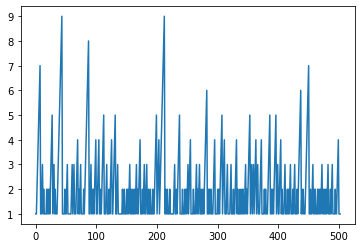

In [12]:
plt.plot(run)

## Problem: Use `any` to find large losses

Use any to determine if any of the 10 portfolios experienced a loss greater than -5%.

In [13]:
np.any(momentum < -.05)

True

In [14]:
# Must use axis to perform column-by-column
np.any(momentum < -.05, axis=0)

mom_01    True
mom_02    True
mom_03    True
mom_04    True
mom_05    True
mom_06    True
mom_07    True
mom_08    True
mom_09    True
mom_10    True
dtype: bool

In [15]:
# Built-in pandas operations work column-by-column
(momentum < -5).any()

mom_01     True
mom_02     True
mom_03     True
mom_04    False
mom_05    False
mom_06    False
mom_07    False
mom_08    False
mom_09    False
mom_10    False
dtype: bool

Use `all` and negation to do the same check as `any`.

In [16]:
~((momentum >= -5).all())

mom_01     True
mom_02     True
mom_03     True
mom_04    False
mom_05    False
mom_06    False
mom_07    False
mom_08    False
mom_09    False
mom_10    False
dtype: bool

## Exercises

### Exercise: all and any
Use all to determine the number of days where all of the portfolio returns were negative. Use any 
to compute the number of days with at least 1 negative return and with no negative returns (Hint: 
use negation (~ or `logical_not`)). 